In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

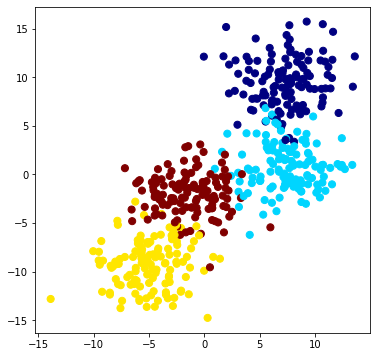

In [3]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=500,centers=4,random_state=8,cluster_std=2.4)

plt.figure(figsize=(6,6))

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='jet')

In [4]:
from sklearn.tree import DecisionTreeClassifier


In [5]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    Visualizes a Decision Tree. 
    INPUTS: Classifier Model, X, y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries of the Decision Tree
    '''
     
    # Fit the X and y data to the tree
    classifier.fit(X, y)

    
    # Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries
        '''
        if i < 0:
            return

        # Shorter variable name
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

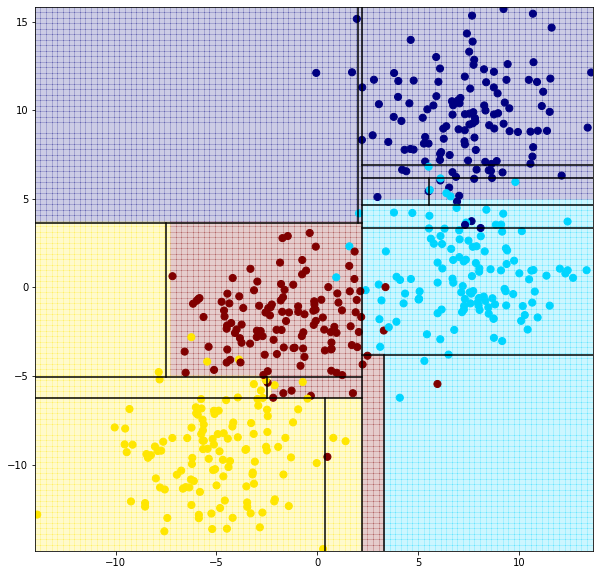

In [7]:
clf = DecisionTreeClassifier(max_depth=4,random_state=0)

visualize_tree(clf,X,y)

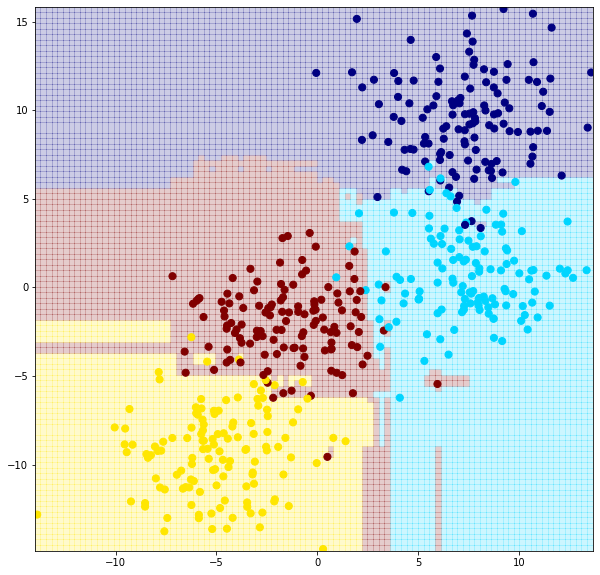

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0)

visualize_tree(clf,X,y,boundaries=False)

In [10]:
#Random forest regression

x = 10 * np.random.rand(100)

In [11]:
x

array([3.97539701, 3.31215533, 1.37078872, 4.75582354, 8.21044861,
       1.03034485, 1.16052722, 3.95420067, 6.74885427, 7.21983724,
       7.01512954, 6.96938776, 7.62620889, 4.22778456, 6.40604911,
       1.96395377, 3.40988358, 7.11145774, 2.08189997, 0.52968574,
       9.56656512, 2.54161686, 6.28100319, 2.56349162, 9.06624233,
       5.59133655, 4.13709989, 3.31025526, 1.97325714, 4.63910145,
       6.73051037, 6.31463532, 0.30637289, 2.18087011, 8.5330111 ,
       7.39410374, 2.3252108 , 4.58576732, 2.02618982, 4.42496413,
       4.22552513, 0.30560009, 1.46165907, 3.82254621, 5.22456349,
       4.23135179, 0.37078684, 0.98169576, 6.79799426, 6.62598808,
       9.71122009, 4.44525305, 7.66940888, 3.23796651, 6.19540243,
       7.07647816, 5.76291416, 0.81606181, 7.77608652, 3.72171981,
       1.44617977, 1.16910808, 0.82437652, 3.63626884, 1.09052437,
       9.08158302, 9.06802033, 5.41859171, 1.0307233 , 5.71523216,
       6.35687109, 6.35871199, 2.07571921, 1.27337164, 7.30156

In [14]:
def sin_model(x,sigma=0.2):
    noise = sigma * np.random.rand(len(x))
    
    return np.sin(5 * x) + np.sin(0.5 * x) + noise

In [15]:
y = sin_model(x)

In [17]:
type(y)

numpy.ndarray

<ErrorbarContainer object of 3 artists>

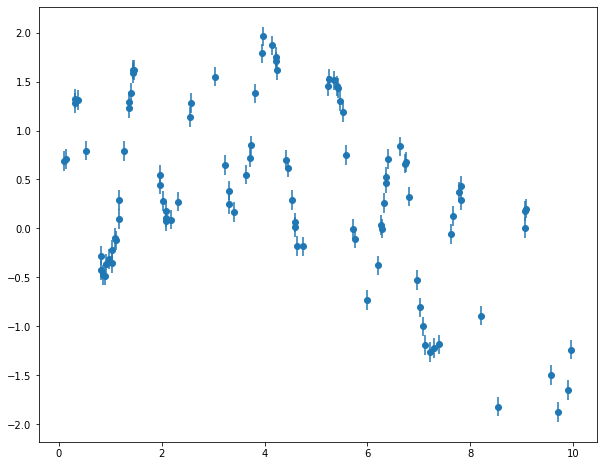

In [19]:
plt.figure(figsize=(10,8))
plt.errorbar(x,y,0.1,fmt='o')

In [20]:
from sklearn.ensemble import RandomForestRegressor

xfit = np.linspace(0,10,1000)

rfr = RandomForestRegressor(100)

rfr.fit(x[:,None],y)


yfit = rfr.predict(xfit[:,None])




In [21]:
ytrue = sin_model(xfit,0)

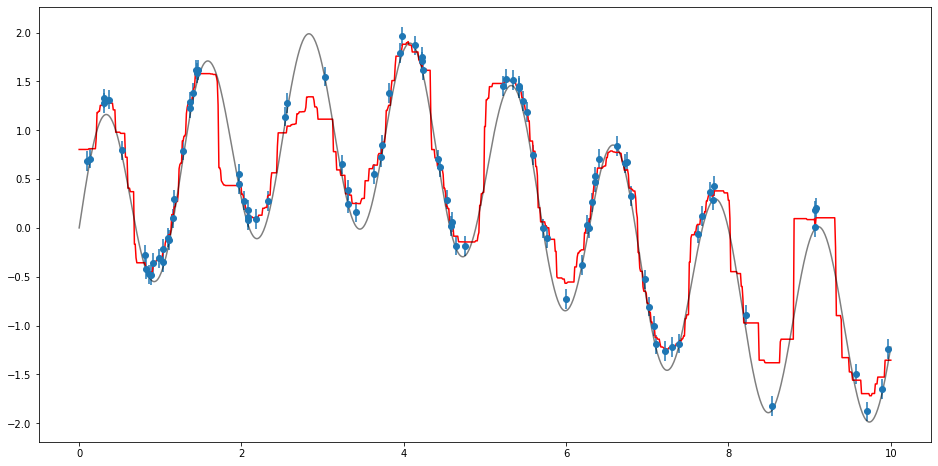

In [23]:
plt.figure(figsize=(16,8))

plt.errorbar(x,y,0.1,fmt='o')

plt.plot(xfit,yfit,'-r')

plt.plot(xfit,ytrue,'-k',alpha=0.5)